In [134]:
import sys
import importlib
import gc
import glob
import random
from itertools import combinations

import numpy as np
import scipy
import sklearn
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import pyemma
import mdtraj as md
import MDAnalysis as mda

import ivac
import extq

sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [2]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots

cm_seq = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.9, dark=0.1, as_cmap=True, reverse=True
)
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("", colors)

In [3]:
dcds = [f"/project2/roux/scguo/ci-vsd/anton2/nowat/civsd.nowat.{i}.dcd" for i in range(3, 20)]

In [4]:
# load test trajectory
u = mda.Universe("../../civsd-nowat.pdb", dcds[0])

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [5]:
u.select_atoms("resname POPC").center_of_mass(pbc=True)

array([39.26080031, 41.27794112, 36.14334413])

In [21]:
u.select_atoms("protein").center_of_mass(pbc=False)

array([ 0.61532134, -0.06710507,  2.07770226])

In [7]:
u.select_atoms("protein and resid 126 161 190").center_of_mass(pbc=True)

array([44.39220311, 14.47029172,  5.8914952 ])

In [8]:
from MDAnalysis.analysis import align, rms

In [33]:
ref = mda.Universe("../../civsd-pro.pdb")

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [48]:
align.AlignTraj(u, ref, select="protein and name CA", in_memory=True).run()
# align.AlignTraj(u, u, select="protein and name CA", in_memory=True).run()

In [36]:
print(ref.select_atoms("protein").center_of_mass())
print(ref.select_atoms("protein and resid 126 161 190").center_of_mass())

[0.61047314 0.03407969 2.32906899]
[1.20773961 1.29379575 0.30889514]


In [49]:
plug = u.select_atoms("protein and resid 126 161 190")
for f in u.trajectory:
    print(plug.center_of_mass(pbc=False))

[ 1.54645293  1.30476599 -1.45010826]
[ 1.51110268  1.50589783 -1.32128327]
[ 1.5126265   1.17345378 -1.19451446]
[ 1.61632682  1.11427506 -1.25773136]
[ 1.58950876  1.23816319 -1.13995138]
[ 1.41411524  0.99672705 -1.25687764]
[ 1.48314537  1.29831372 -1.00410025]
[ 1.57791781  1.30349702 -1.18826122]
[ 1.41949989  1.03873996 -1.20816274]
[ 1.35336596  1.03348671 -1.07624082]
[ 1.39323779  1.32154048 -1.23853655]
[ 1.3867598   1.05727422 -0.90779525]
[ 1.35372057  0.98926198 -0.91069964]
[ 1.2329936   1.21981631 -1.12772916]
[ 1.46682779  1.33726337 -0.98273487]
[ 1.65664481  1.09385756 -1.21964098]
[ 1.36986916  1.10897442 -1.31205331]
[ 1.42675053  1.08157114 -0.90092842]
[ 1.46582419  1.30243786 -1.29149544]
[ 1.51534936  1.07995302 -0.99409031]
[ 1.80716485  1.20767014 -1.19865348]
[ 1.54899307  0.92932561 -1.58595211]
[ 1.39473889  1.22151491 -1.09564214]
[ 1.25475669  1.25355449 -0.85095384]
[ 1.50168961  1.10715613 -1.03599925]
[ 1.64987957  1.22684343 -0.94910041]
[ 1.44543546

In [50]:
u.select_atoms("protein").center_of_mass(pbc=False)

array([ 0.61532137, -0.06710511,  2.07770226])

In [51]:
u.select_atoms("protein and resid 226 and name CZ").positions

array([[5.95852 , 2.069715, 8.043589]], dtype=float32)

In [40]:
from MDAnalysis.analysis import leaflet

In [54]:
lf = leaflet.LeafletFinder(u, "name P O11 O12 O13 O14 N ", pbc=True)

In [60]:
lf.groups

<bound method LeafletFinder.groups of <LeafletFinder('name P O11 O12 O13 O14 N ', cutoff=15.0 A) with 1178 atoms in 1 groups>>

# S4 tilt

In [52]:
s4_sel = "protein and resid 215 to 239"
s4_ag = u.select_atoms(s4_sel)

In [53]:
e1, e2, e3 = s4_ag.principal_axes()

In [54]:
e1

array([ 0.86219341, -0.49708286,  0.09762766])

In [55]:
e2

array([-0.44970947, -0.83977159, -0.3042122 ])

In [56]:
e3

array([ 0.23320361,  0.21838567, -0.9475884 ])

In [57]:
r = np.linalg.norm(e3)
phi = np.arccos(np.abs(e3[-1] / r))

In [58]:
phi * 180 / np.pi

18.632308788265494

In [47]:
for _ in u.trajectory:
    _, _, e3 = s4_ag.principal_axes()
    r = np.linalg.norm(e3)
    phi = np.arccos(np.abs(e3[-1] / r))
    print(phi * 180 / np.pi)

18.632308874092743
17.110793067159644
18.84177722120815
18.479068082312907
20.171121855702836
20.97358886066054
19.722525340704475
19.634085341247154
18.87688826515783
19.787334026926278
19.760809621030713
19.38513684480755
18.42480918413025
19.309502296192115
19.484455453014775
19.616793472228114
18.912106671849955
18.424694774620438
19.454292850187016
17.34476150800907
16.903060682703185
18.08032656993442
17.656702313976133
18.234426525777458
17.83627687682321
18.929731215709268
18.743748030206174
18.43660909554726
18.701011899431954
17.489271514990698
18.637395886208736
17.98772233400089
17.41361872323209
18.399791147377933
19.700179124090834
18.699420571716747
20.280539679183846
18.372034719561864
19.088904883486826
17.82160341247538
18.54079841950049
20.098333199229426
18.337794017478707
21.275806905318294
19.690656869616326
19.78661952169764
18.521295830100502
18.734691569998663
19.515863233405597
19.8684584045184
19.825567503858117
19.214357889369182
19.858224091356078
20.546572

## Compute for all trajectories

In [61]:
from multiprocessing import cpu_count
n_jobs = cpu_count()
import dask.multiprocessing
dask.config.set(scheduler='processes')

In [140]:
# @dask.delayed
def compute_func_traj(trajfile, func):
    u = create_align(trajfile)
    
    result = []
    for _ in u.trajectory:
        result.append(func(u))
        
    return result

In [110]:

def create_align(trajfile):
    u = mda.Universe("../../civsd-nowat.pdb", trajfile)
    ref = mda.Universe("../../civsd-pro.pdb")
    align.AlignTraj(u, ref, select="protein and name CA", in_memory=True).run()
    
    return u

In [125]:
# @dask.delayed
def compute_s4_tilt(u):
    s4_sel = "protein and resid 215 to 239"
    s4_ag = u.select_atoms(s4_sel)
    _, _, e3 = s4_ag.principal_axes()
    r = np.linalg.norm(e3)
    phi = np.arccos(np.abs(e3[-1] / r))
    return (phi * 180 / np.pi)

In [112]:
s4_tilt_jobs = [compute_func_traj(d, compute_s4_tilt) for d in dcds]

In [80]:
test_job = compute_func_traj(dcds[0], compute_s4_tilt)

In [81]:
ans = dask.delayed(test_job)

In [87]:
test_job.compute()

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


[18.63230886724465,
 17.16131152924527,
 18.80695897086178,
 18.439106289750203,
 20.16263452856517,
 21.007492620840505,
 19.785036657898573,
 19.674625291762993,
 18.897853262640908,
 19.744495959221876,
 19.71853608136362,
 19.348828976615696,
 18.333669762121602,
 19.283054514717268,
 19.44249474121802,
 19.53950358761046,
 18.81956170751862,
 18.388771688896142,
 19.355687241990175,
 17.384875421884974,
 16.89894965698105,
 18.143363944891377,
 17.701319167419786,
 18.26330567423512,
 17.74800607877921,
 18.86894802566208,
 18.71753817066365,
 18.332856689288647,
 18.628089011783345,
 17.34362715726756,
 18.574258420219984,
 17.941871074712225,
 17.32972828017987,
 18.337112050753095,
 19.653588643180466,
 18.59639348671345,
 20.29885398776227,
 18.453908365371692,
 19.05379894820571,
 17.86829043550291,
 18.619440428114086,
 20.203806655336226,
 18.43249369491909,
 21.343299789816996,
 19.811844252921727,
 19.84864497864675,
 18.535661628744858,
 18.73880957309981,
 19.4916389705

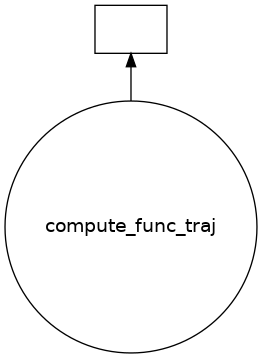

In [88]:
test_job.visualize()

In [113]:
s4_tilt_jobs = dask.delayed(s4_tilt_jobs)

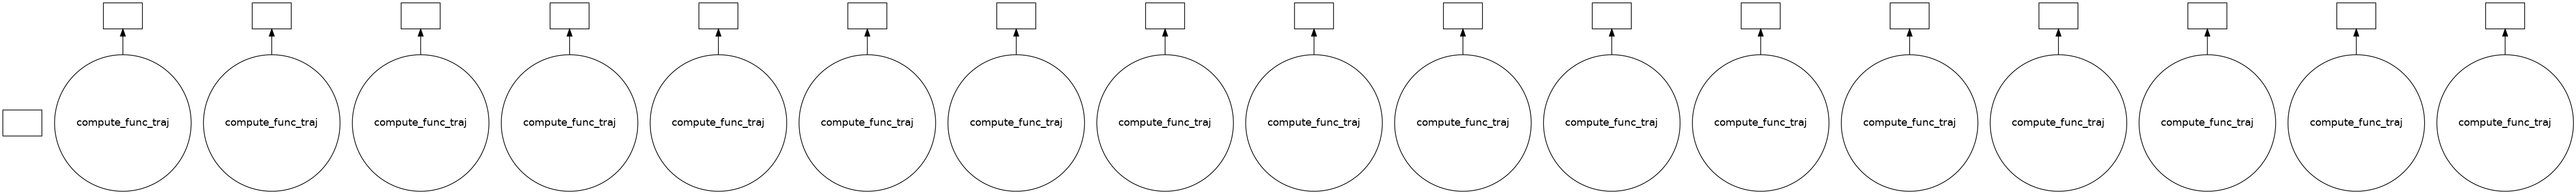

In [114]:
s4_tilt_jobs.visualize()

In [115]:
s4_tilt = s4_tilt_jobs.compute()

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/project2/

In [116]:
len(s4_tilt)

17

In [117]:
s4_tilt = [np.asarray(arr) for arr in s4_tilt]

In [118]:
np.save("../../data/raw_feat/cv_s4_tilt_anton2.npy", s4_tilt)

(array([1.0000e+01, 6.0000e+01, 4.8000e+02, 2.0990e+03, 7.3470e+03,
        1.4342e+04, 1.7674e+04, 1.9069e+04, 1.9921e+04, 1.9141e+04,
        1.7913e+04, 1.6608e+04, 1.4289e+04, 1.0279e+04, 6.2900e+03,
        2.9990e+03, 1.0850e+03, 3.5000e+02, 5.3000e+01, 8.0000e+00]),
 array([11.42413315, 13.3786062 , 15.33307925, 17.2875523 , 19.24202535,
        21.19649841, 23.15097146, 25.10544451, 27.05991756, 29.01439061,
        30.96886366, 32.92333672, 34.87780977, 36.83228282, 38.78675587,
        40.74122892, 42.69570198, 44.65017503, 46.60464808, 48.55912113,
        50.51359418]),
 <BarContainer object of 20 artists>)

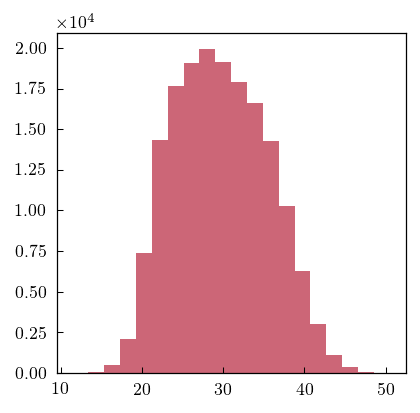

In [119]:
plt.hist(np.concatenate(s4_tilt), bins=20)

In [120]:
# previous anton trajectories
remove = {1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
}
xtcs = []
for i in range(1000, 1295):
    if i not in remove:
        xtcs.append(f"../../anton/xtccombined/civsd_{i}.xtc")

In [141]:
def create_align(trajfile):
    u = mda.Universe("../../civsd-pro.pdb", trajfile)
    ref = mda.Universe("../../civsd-pro.pdb")
    align.AlignTraj(u, ref, select="protein and name CA", in_memory=True).run()
    
    return u

In [128]:
test_job = compute_func_traj(xtcs[0], compute_s4_tilt)

In [129]:
test_job.compute()

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '../../anton/xtccombined/.civsd_1000.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[24.792789205839245,
 22.921193858840088,
 22.151389481344715,
 22.784336190626764,
 23.454898373324287,
 23.76023260568513,
 22.191067319282325,
 23.64193173759201,
 22.084598698550224,
 23.70622579779071,
 26.270170026013208,
 26.35453641698571,
 26.3659403067075,
 28.02654730444549,
 29.361395573792546,
 27.462058114901623,
 25.603689581925778,
 27.576501371174334,
 26.66965665529953,
 24.664276241865327,
 27.87874100239439,
 27.842860535899998,
 28.919971409096277,
 28.823780296428243,
 27.989687493094397,
 26.278449347004713,
 25.85622841269019,
 26.361368136043318,
 27.042287994989884,
 27.146076951892173,
 28.15135528903609,
 24.7466952015805,
 27.232772466827836,
 27.311934032843098,
 27.47991452962292,
 26.65975543059283,
 26.34054362835033,
 27.358696945737403,
 28.151803944173054,
 28.93846965945642,
 28.201545582775605,
 25.939799589656925,
 27.42671924033859,
 27.645150076616474,
 28.144146498736724,
 28.879722653455868,
 27.68231638524059,
 29.456646116380938,
 29.7466123

In [137]:
s4_tilt_jobs = [compute_func_traj(x, compute_s4_tilt) for x in xtcs]

In [138]:
s4_tilt_jobs = dask.delayed(s4_tilt_jobs)

In [ ]:
s4_tilt_jobs.visualize()

In [139]:
s4_tilt_anton = s4_tilt_jobs.compute()

KeyboardInterrupt: 

### use joblib

In [142]:
from joblib import Parallel, delayed

In [144]:
s4_tilt_jobs = [create_align(x) for x in xtcs]

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '../../anton/xtccombined/.civsd_1000.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets becaus

KeyboardInterrupt: 

In [145]:
def analyze_func_traj(u, func):
    result = []
    for _ in u.trajectory:
        result.append(func(u))
        
    return result

In [146]:
results_ensemble = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(compute_func_traj)(x, compute_s4_tilt) for x in xtcs)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/project2/roux/scguo/anaconda/envs/py39/lib/

In [147]:
len(results_ensemble)

237

In [148]:
np.save("../../data/raw_feat/cv_s4_tilt_anton.npy", results_ensemble)

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


(array([1.10700e+03, 1.14940e+04, 2.19740e+04, 1.78680e+04, 3.38450e+04,
        9.75290e+04, 2.42951e+05, 4.30214e+05, 5.05669e+05, 4.68277e+05,
        4.39062e+05, 3.36709e+05, 2.02387e+05, 1.08673e+05, 5.25070e+04,
        2.26540e+04, 6.12900e+03, 8.56000e+02, 8.80000e+01, 7.00000e+00]),
 array([ 1.55865147,  4.22198664,  6.88532181,  9.54865698, 12.21199215,
        14.87532732, 17.5386625 , 20.20199767, 22.86533284, 25.52866801,
        28.19200318, 30.85533835, 33.51867352, 36.1820087 , 38.84534387,
        41.50867904, 44.17201421, 46.83534938, 49.49868455, 52.16201972,
        54.8253549 ]),
 <BarContainer object of 20 artists>)

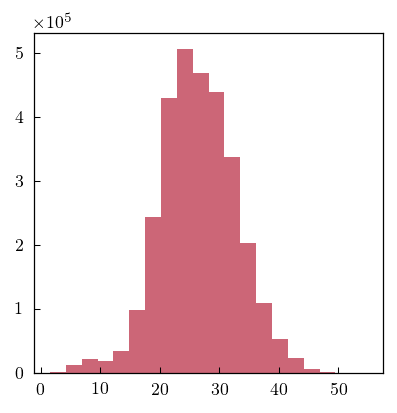

In [150]:
plt.hist(np.concatenate(results_ensemble), bins=20)

## Dask testing

In [ ]:
import dask

In [37]:
inc = lambda x: x + 1
add = lambda a, b: a + b
x = dask.delayed(inc)(1)
y = dask.delayed(inc)(2)
z = dask.delayed(add)(x, y)
z.compute()

5

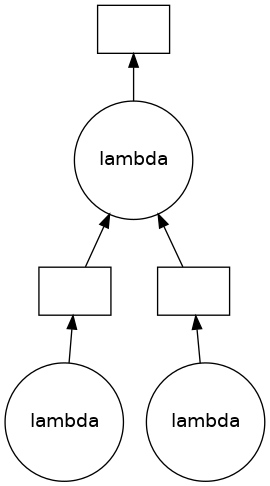

In [41]:
z.visualize()

In [62]:
from dask.distributed import Client

client = Client(n_workers=n_jobs)
client

/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/project2/roux/scguo/anaconda/envs/py39/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/project2/roux/scguo/anac

<Client: 'tcp://127.0.0.1:43925' processes=40 threads=40, memory=179.00 GiB>

# Plot with other coordinates

In [151]:
lags = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

In [152]:
weights = np.load("../../data/feat2_dist_du_anton2/weights.npy", allow_pickle=True)

In [153]:
q_downup = np.load("../../data/feat2_dist_du_anton2/q_downup.npy", allow_pickle=True)

In [154]:
cv_trajs = list(np.load('../../data/raw_feat/cv_dist_spin_anton.npy', allow_pickle=True))
cv_trajs.extend(np.load("../../data/raw_feat/cv_dist_spin_anton2.npy"))

In [155]:
sb_labels = []
for r in ('R217', 'R223', 'R226', 'R229', 'R232'):
    for n in ('D129', 'D136', 'D151', 'D164', 'E183', 'D186'):
        sb_labels.append(f'{r} - {n}')

In [156]:
sb_trajs = list(np.load('../../data/raw_feat/feat2_raw_anton.npy', allow_pickle=True))
# sb_trajs = []
# for i in range(6):
#     sb_trajs.extend(np.load(f'../../data/raw_feat/feat2_suppl_{i:02d}.npy', allow_pickle=True))
sb_trajs.extend(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [157]:
cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

(3170017, 2) (3170017, 60)


In [158]:
random.seed(123)
s = 10
N = len(cv_arr)
inds = random.sample(range(N), N // s)

In [159]:
s4_tilt = np.concatenate([*s4_tilt, *results_ensemble])
print(s4_tilt.shape)

(3170017,)


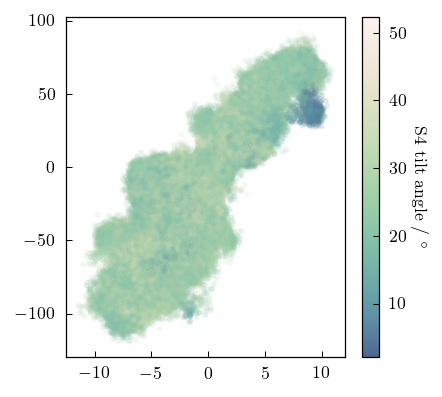

In [162]:
sc = plt.scatter(cv_arr[inds, 0], cv_arr[inds, 1], c=s4_tilt[inds], alpha=0.1, cmap=cm_seq)
cb = plt.colorbar()
cb.solids.set(alpha=1.0)
cb.set_label("S4 tilt angle / $^\circ$", rotation=-90, labelpad=10)

In [163]:
sb_ids = [42, 48, 47, 53]

In [164]:
sb_models = np.load("../../data/models_centroids_feat2.npy")

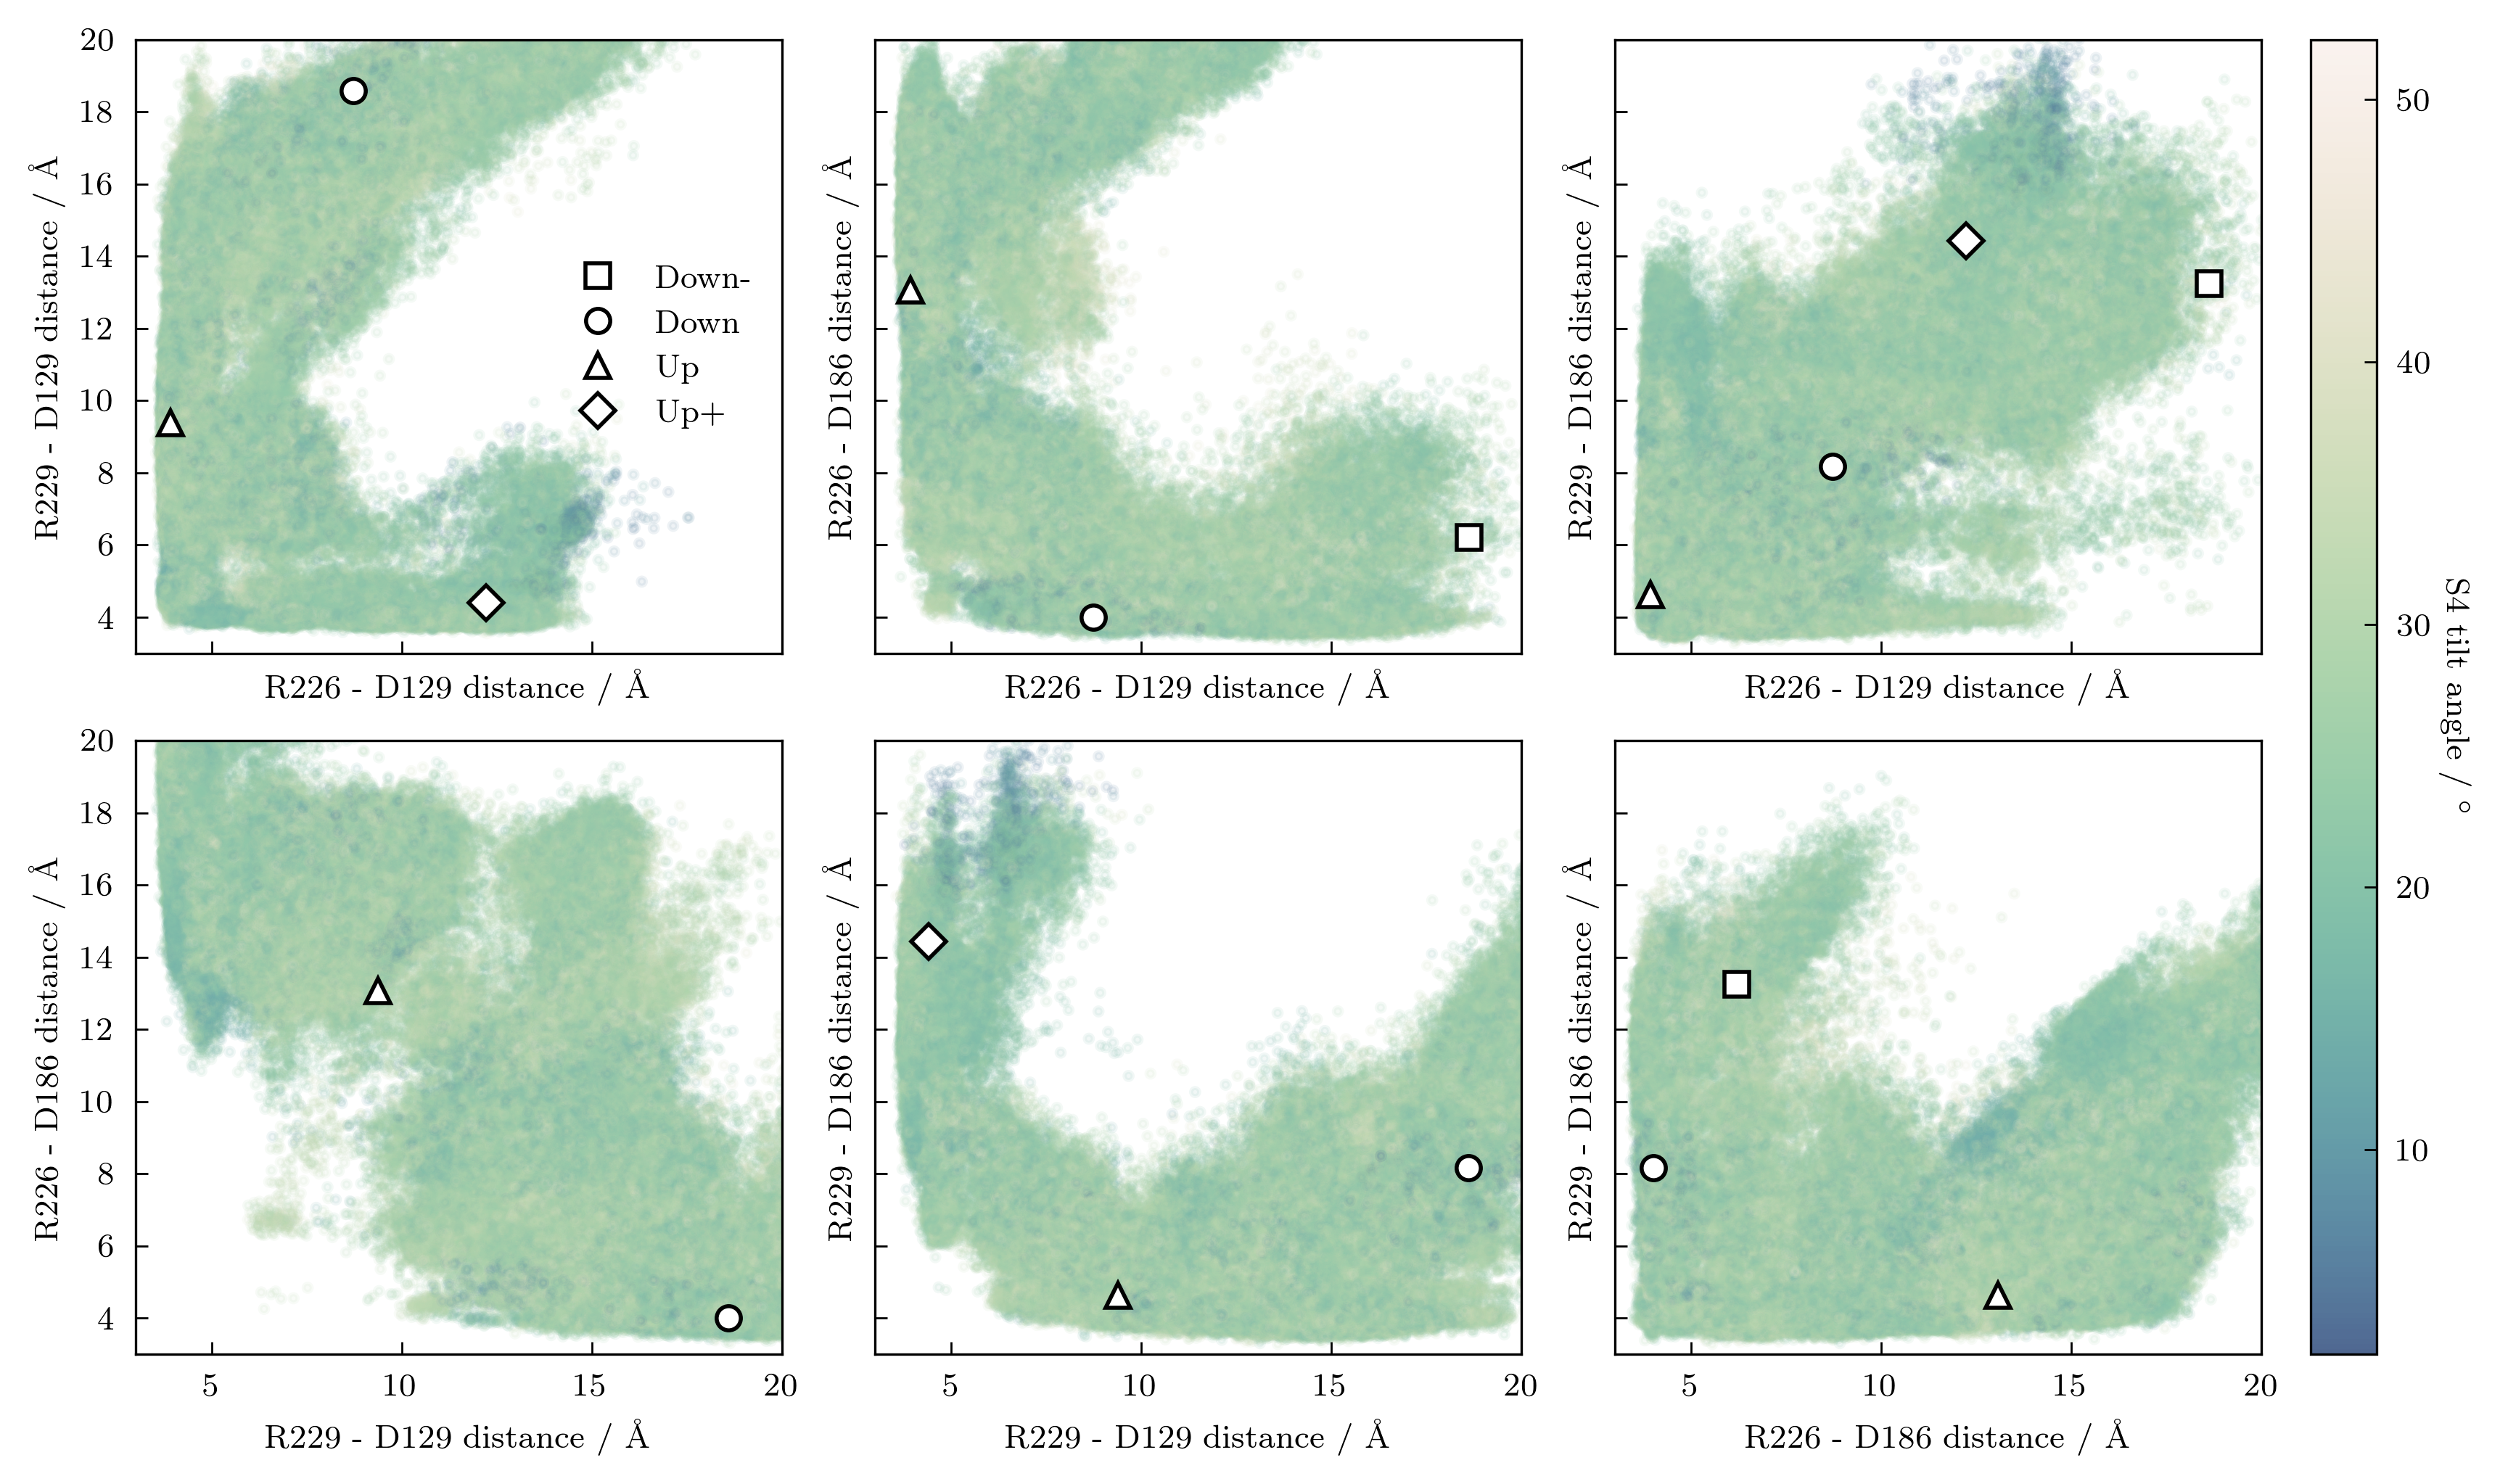

In [166]:
f, axes = plt.subplots(
    2, 3, figsize=(8.5, 5), dpi=400, sharex=True, sharey=True, constrained_layout=True)

r = [[3, 20], [3, 20]]
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    sc = ax.scatter(
        sb_arr[inds, sb1] * 10, 
        sb_arr[inds, sb2] * 10, 
        c=s4_tilt[inds], 
        alpha=0.1, 
        cmap=cm_seq)
    ax.set(
        xlabel=f"{sb_labels[sb1 - 30]} distance / Å", 
        ylabel=f"{sb_labels[sb2 - 30]} distance / Å",
        xlim=r[0],
        ylim=r[1]
    )
    
    plotting.plot_models(ax, sb_models[:, [sb1, sb2]] * 10, ms=6)
    # ax.label_outer()

axes.flat[0].legend(loc='right')
cbar = f.colorbar(sc, ax=axes[:, -1])
cbar.solids.set(alpha=1)
cbar.set_label('S4 tilt angle / $^\circ$', rotation=-90, labelpad=10)

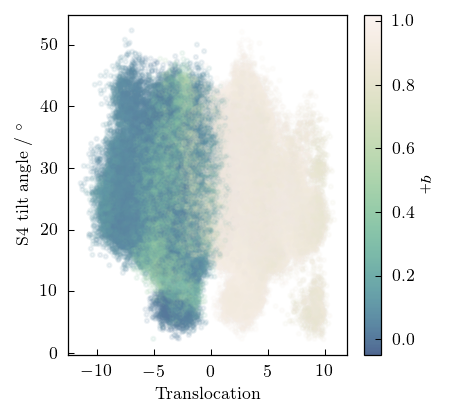

In [168]:
q_arr = np.concatenate(q_downup[7])
sc = plt.scatter(cv_arr[inds, 0], s4_tilt[inds], c=q_arr[inds], alpha=0.1, cmap=cm_seq)
plt.xlabel("Translocation")
plt.ylabel("S4 tilt angle / $^\circ$")

cb = plt.colorbar()
cb.solids.set(alpha=1.0)
cb.set_label("$q_+$", rotation=-90, labelpad=10)